**Importing necessary librarires**

In [1]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

**Setting path of anchor positive and negative folder**

In [2]:
pos_path = os.path.join('data', 'positive')
neg_path = os.path.join('data', 'negative')
anc_path = os.path.join('data', 'anchor')

**Prepare directories to save images**

In [3]:
# os.makedirs(pos_path)
# os.makedirs(neg_path)
# os.makedirs(anc_path)

**Downloading labelled face in wild lfw dataset**

In [4]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

**Unzipping the folder**

In [5]:
!tar -xf lfw.tgz

In [6]:
# #Move lfw images to the negative folder
for dir in os.listdir(r'C:\Users\artem\Downloads\archive.zip\lfw-deepfunneled\lfw-deepfunneled'):
    for file in os.listdir(os.path.join(r'C:\Users\artem\Downloads\archive.zip\lfw-deepfunneled\lfw-deepfunneled', dir)):
        ex_path = os.path.join(r'C:\Users\artem\Downloads\archive.zip\lfw-deepfunneled\lfw-deepfunneled', dir, file)
        new_path = os.path.join(neg_path, file)
        os.replace(ex_path, new_path)

In [7]:
# If above doesn't work then download directly from web and do following
import shutil

source = r'D:\python\face recognition\New folder'; destination = neg_path

for dirs in os.listdir(source):
    for file in os.listdir(os.path.join(source, dirs)):
        shutil.copy(os.path.join(source, dirs, file), destination)

Import uuid lib to uniquely name the images that is captured from webcam

In [8]:
#Import uuid library to generate unique image names
import uuid #universally unique identifier

In [9]:
#Establish a connection to webcam
cap = cv2.VideoCapture(0) #0 means the webcam of laptop
while cap.isOpened():
    ret, frame = cap.read()
    
    #cut down frames to 250x250 px
    frame = frame[50:300,250:500,:] #taing a frame of 250,250,3(rgb) frame to capture image
    
    #Collect Anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        img_name = os.path.join(anc_path, f'{uuid.uuid1()}.jpg' )
        cv2.imwrite(img_name, frame)
        
    #Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        img_name = os.path.join(pos_path, f'{uuid.uuid1()}.jpg' )
        cv2.imwrite(img_name, frame)
        
    #Show img to screen
    cv2.imshow('Image Collection', frame)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

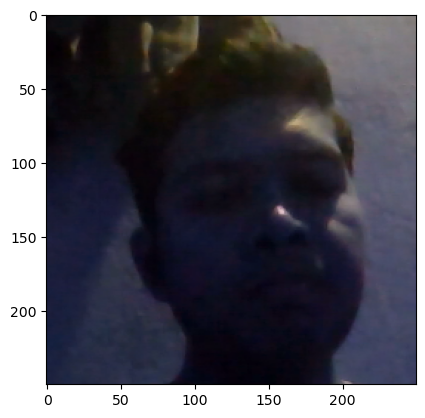

In [10]:
plt.imshow(frame)